<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Preprocessing_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Browsing to Local Directory
import os
os.chdir("C:/Users/sanuj/Documents/FoTo/")
!dir

In [ ]:
#@title Download Stopwords , punkt, wordnet
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#@title Imports
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import torch.optim as optim
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
# @title preprocessing non-stem (old)
# import sklearn
# import re
# import string
# from numpy import random
# # from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# from nltk import word_tokenize
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer


# # stem = PorterStemmer()
# wnl = WordNetLemmatizer()
# stopwords = ['would' ,'know' ,'dont' ,'get', 'like', 'think' ,'im' ,"also","said","a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep  keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure    t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]

# def preprocessing_nonstem(doc, word2vec_model):
#     # word_vectors = word2vec_model.wv
#     doc = doc.lower()
#     doc = doc.translate(str.maketrans('', '', string.punctuation))
#     doc = word_tokenize(doc)
#     doc = filter(lambda x: x not in string.punctuation)
#     doc = filter(lambda x:x not in stopwords, doc)
#     doc = filter(lambda x:not x.isdigit(), doc)
#     doc = [wnl.lemmatize(w.lower()) for w in doc]
#     doc = filter(lambda x: x in word2vec_model.vocab)
#     doc = ' '.join(e for e in doc)
#     return doc

In [ ]:
#@title preprocessing non-stem
import sklearn
import re
import string
from numpy import random
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gc,time.time as time
# stem = PorterStemmer()
wnl = WordNetLemmatizer()

from nltk.corpus import stopwords as stp
stop_nltk = stp.words('english')
from sklearn.feature_extraction import text
stop_eng = text.ENGLISH_STOP_WORDS

stopwords_manual = ['would','know','dont','get','like','think','im',"also","said","a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep  keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure    t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]
stopwords = list(set(list(stop_eng) +  stopwords_manual + stop_nltk))

def preprocessing_nonstem(doc, word2vec_model,my_punctuation):
    # print(doc)
    # word_vectors = word2vec_model.wv
    doc = doc.lower()
    # print(doc)
    doc = doc.translate(str.maketrans('', '', my_punctuation))
    doc = word_tokenize(doc)
    doc = filter(lambda x: x not in my_punctuation, doc)
    # doc = filter(lambda x:x not in stopwords, doc)
    doc = filter(lambda x:not x.isdigit(), doc)
    doc = [wnl.lemmatize(w.lower()) for w in doc]
    # doc = filter(lambda x: x in word2vec_model.vocab,doc)
    doc = filter(lambda x:x not in stopwords, doc)
    doc = filter(lambda x: x in word2vec_model.vocab or x in ".",doc)
    # doc = filter(lambda x:x not in stopwords, doc)
    doc = ' '.join(e for e in doc)
    return doc


# Google Pre-trained Model & Word2Vec | Data preprocessing



In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
gc.collect()

--2020-11-27 19:48:58--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  75.1MB/s    in 22s     

2020-11-27 19:49:20 (71.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



0

In [ ]:
start=time()
!gunzip GoogleNews-vectors-negative300.bin.gz
print('Cell took %.2f seconds to run.' % (time() - start))
gc.collect()

Cell took 45.97 seconds to run.


0

In [ ]:
# Local
from gensim import models
# word2vec_model = models.KeyedVectors.load_word2vec_format(
#     'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
word2vec_model = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

In [ ]:
def reuters():
  reuters_train_data_read = open("C:/Users/sanuj/Documents/FoTo/data/reuters/r8-train-all-terms.txt", "r")
  reuters_test_data_read = open("C:/Users/sanuj/Documents/FoTo/data/reuters/r8-test-all-terms.txt", "r")
  reuters_data = reuters_train_data_read.readlines()
  test_reuters = reuters_test_data_read.readlines()
  reuters_data.extend(test_reuters)
  reuters_data_list= [r.split('\t') for r in reuters_data]
  reuters_labels=[]
  reuters_docs=[]

  for r in reuters_data_list:
    reuters_labels.append(r[0])
    reuters_docs.append(r[1])

  return reuters_docs,reuters_labels

def webkb():
  webkb_train_data_read = open("C:/Users/sanuj/Documents/FoTo/data/webkb/webkb-train-stemmed.txt", "r")
  webkb_test_data_read = open("C:/Users/sanuj/Documents/FoTo/data/webkb/webkb-test-stemmed.txt", "r")
  webkb_data = webkb_train_data_read.readlines()
  test_webkb = webkb_test_data_read.readlines()
  webkb_data.extend(test_webkb)
  webkb_data_list= [r.split('\t') for r in webkb_data]
  webkb_labels=[]
  webkb_docs=[]

  for r in webkb_data_list:
    webkb_labels.append(r[0])
    webkb_docs.append(r[1])

  return webkb_docs , webkb_labels

def twentynews():
  from sklearn.datasets import fetch_20newsgroups
  data_20news=fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'))
  targets = data_20news.target
  target_labels = data_20news.target_names
  labels = [target_labels[t] for t in targets]
  return data_20news.data , labels

def WoS():
  data_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/WebOfScience/WOS46985/X.txt", "r")
  targets_WoS_read = open("C:/Users/sanuj/Documents/FoTo/data/WebOfScience/WOS46985/YL1.txt", "r")
  data_WoS = data_WoS_read.readlines()
  targets_WoS = targets_WoS_read.readlines()

  data_WoS = [d.strip() for d in data_WoS]
  targets_WoS = [int(d.strip()) for d in targets_WoS]

  labels_dict ={
    0 : "Computer Science",
    1 : "Electrical Engineering",
    2 : "Psychology",
    3 : "Mechanical Engineering",
    4 : "Civil Engineering",
    5 : "Medical Science",
    6 : "Biochemistry"}

  targets_WoS_labels = [labels_dict[t] for t in targets_WoS]
  return data_WoS,targets_WoS_labels

def arXiv():
  data_read = open("C:/Users/sanuj/Documents/FoTo/data/arXiv/text.txt", "r",encoding="utf8")
  targets_read = open("C:/Users/sanuj/Documents/FoTo/data/arXiv/labels.txt", "r",encoding="utf8")
  data = data_read.readlines()
  targets = targets_read.readlines()
  data_new = [d.strip("_PAPER_") for d in data]
  targets_new = [d.strip("_PAPER_") for d in targets]
  data_nenw = [re.sub(r'\d+_ ', '',d) for d in data_new]
  targets_nenw = [re.sub(r'\d+_ ', '',d) for d in targets_new]
  targets_final = [d.split()[0] for d in targets_nenw]

  return data_nenw , targets_final

def r52():
  reuters_train_data_read = open("C:/Users/sanuj/Documents/FoTo/data/reuters/r52/r52-train-all-terms.txt", "r")
  reuters_test_data_read = open("C:/Users/sanuj/Documents/FoTo/data/reuters/r52/r52-test-all-terms.txt", "r")
  reuters_data = reuters_train_data_read.readlines()
  test_reuters = reuters_test_data_read.readlines()
  reuters_data.extend(test_reuters)
  reuters_data_list= [r.split('\t') for r in reuters_data]
  reuters_labels=[]
  reuters_docs=[]
  for r in reuters_data_list:
    reuters_labels.append(r[0])
    reuters_docs.append(r[1])
  return reuters_docs,reuters_labels

def crowdGender():
  import pandas as pd
  df = pd.read_csv("gender_classifier_dfe_791531.csv")
  df = df[['gender','text']]
  null_data = df[df.isnull().any(axis=1)]
  # display(null_data)
  df=df.dropna(how='any',axis=0)
  return df['text'].values,df['gender'].values

# Data Loading and Preprocessing

In [ ]:
##### Load Data Here #####
loaded_data = crowdGender
##########################

docs, labels = loaded_data()

In [ ]:
my_punctuation_sentence = string.punctuation.replace(".","") # sentences
my_punctuation_docs = string.punctuation.replace(".",".") # docs
# print(my_punctuation_sentence)

In [ ]:
dots = [(". "*k).strip() for k in range(1,100)]
def docs_labels_preprocessing(docs,labels,word2vec_model,my_punctuation):
  data_preprocessed = []
  data_preprocessed_labels = []
  for i in range(len(docs)):
    doc = preprocessing_nonstem(docs[i],word2vec_model,my_punctuation)
    # doc[i] = docs[i].replace(".","")
    if(doc!='' and (doc not in dots)):
      data_preprocessed.append(doc)
      data_preprocessed_labels.append(labels[i])
  return data_preprocessed,data_preprocessed_labels

In [ ]:
# Crowd Data
data_preprocessed_crowd,data_preprocessed_labels_crowd = docs_labels_preprocessing(docs,labels,word2vec_model,my_punctuation_docs)

In [ ]:
data_preprocessed_wdot,data_preprocessed_labels_wdot = docs_labels_preprocessing(docs,labels,word2vec_model,my_punctuation_sentence)

In [ ]:
save_obj(data_preprocessed_wdot,'data_preprocessed_wdot')
save_obj(data_preprocessed_labels_wdot,'data_preprocessed_labels_wdot')

In [ ]:
data_preprocessed_ndot,data_preprocessed_labels_ndot = docs_labels_preprocessing(docs,labels,word2vec_model,my_punctuation_docs)

In [ ]:
len(data_preprocessed_wdot),len(data_preprocessed_labels_wdot)

(18248, 18248)

In [ ]:
len(data_preprocessed_ndot),len(data_preprocessed_labels_ndot)

(18248, 18248)

In [ ]:
with open("docs_wdot_18248.txt", "w") as output:
  for k in range(len(data_preprocessed_wdot)):
    output.write(str(k+1)+')  '+str(data_preprocessed_wdot[k])+'\n')
    output.write(str(k+1)+')  '+str(data_preprocessed_labels_wdot[k])+'\n\n')
    # output.write(str(k+1)+')  '+train_label[indices[k].item()]+'\n\n')
output.close()

In [ ]:
with open("docs_ndot_18248.txt", "w") as output:
  for k in range(len(data_preprocessed_ndot)):
    output.write(str(k+1)+')  '+str(data_preprocessed_ndot[k])+'\n')
    output.write(str(k+1)+')  '+str(data_preprocessed_labels_ndot[k])+'\n\n')
    # output.write(str(k+1)+')  '+train_label[indices[k].item()]+'\n\n')
output.close()

In [ ]:
# data_preprocessed_wdot[2609],data_preprocessed_ndot[2609]
save_obj(data_preprocessed_wdot,'data_preprocessed_wdot_18248')

In [ ]:
c=0
data_w_sent_nspc = []
data_w_sent = data_preprocessed_wdot[13550].split('.')
# data_w_sent
for d in data_w_sent:
  if d == ' ':
    c=c+1
  else:
    data_w_sent_nspc.append(d)

175

In [ ]:
with open("doc_13550.txt", "w") as output:
  for k in range(len(data_w_sent)):
    output.write(data_w_sent[k]+'\n')
output.close()

In [ ]:
len(data_w_sent_nspc), len(data_w_sent) - c

(682, 682)

In [ ]:
def docs_to_sentence(data_preprocessed,data_preprocessed_labels):
  data_preprocessed_labels_sentence = []
  data_preprocessed_sentence = []
  doc_id_sent = []

  for i in range(len(data_preprocessed)):
    s = data_preprocessed[i].split('.')
    for j in s:
      j= j.split()
      j = filter(lambda x:x not in stopwords, j)
      j = ' '.join([e for e in j])
      if (j!=''):
        data_preprocessed_sentence.append(j)
        data_preprocessed_labels_sentence.append(data_preprocessed_labels[i])
        doc_id_sent.append(i+1)

  return data_preprocessed_sentence,data_preprocessed_labels_sentence,doc_id_sent

In [ ]:
data_preprocessed_sentence_w,data_preprocessed_labels_sentence_w,doc_id_sent_w = docs_to_sentence(data_preprocessed_wdot,data_preprocessed_labels_wdot)

In [ ]:
len(data_preprocessed_sentence_w),len(data_preprocessed_labels_sentence_w),len(doc_id_sent_w)

(167718, 167718, 167718)

In [ ]:
def most_frequent(List):
    return max(set(List), key = List.count)
most_freq = most_frequent(doc_id_sent_w)

In [ ]:
doc_id_count = []
for i in set(doc_id_sent_w):
  doc_id_count.append(doc_id_sent_w.count(i))

In [ ]:
max(doc_id_count),doc_id_count.index(max(doc_id_count))+1

In [ ]:
max_sent = doc_id_sent_w.count(most_freq)
max_sent,most_freq

In [ ]:
doc_id_array = np.array(doc_id_sent_w)

In [ ]:
output,counts = torch.unique(torch.from_numpy(doc_id_array) , return_counts=True)
doc_id_val,doc_id_indices =  torch.sort(counts,descending=True)

(array([1.8022e+04, 1.3000e+02, 3.5000e+01, 2.3000e+01, 1.2000e+01,
        7.0000e+00, 1.2000e+01, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  1. ,  69.1, 137.2, 205.3, 273.4, 341.5, 409.6, 477.7, 545.8,
        613.9, 682. ]),
 <a list of 10 Patch objects>)

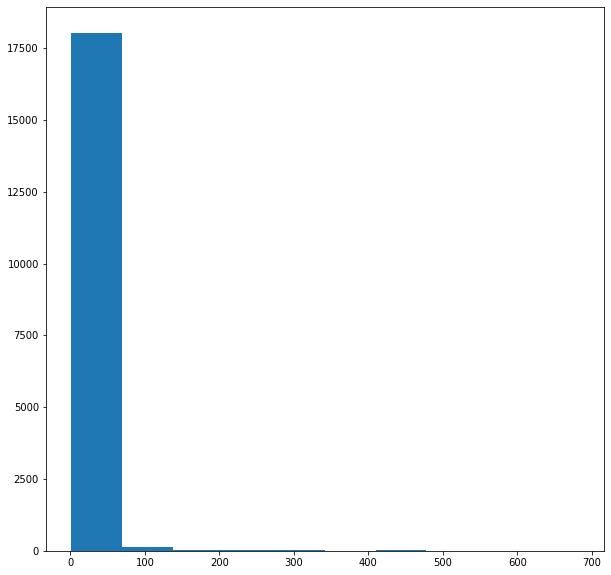

In [ ]:
import numpy
from matplotlib import pyplot as plt
# plt.hist(numpy.log2(doc_id_val.numpy()))
plt.figure(figsize=(10,10))
plt.hist(doc_id_val.numpy())

Saving obj to pickle

In [ ]:
save_obj(doc_id_sent_w,'doc_id_sent_'+loaded_data.__name__)

In [ ]:
data_preprocessed_crowd

In [ ]:
save_obj(data_preprocessed_crowd, 'data_'+loaded_data.__name__+'_preprocessed_sent')
save_obj(data_preprocessed_labels_crowd,'data_'+loaded_data.__name__+'_labels_sent')

In [ ]:
word2vec_model['v']

# Generate Embeddings


In [ ]:
data_preprocessed,data_preprocessed_labels = data_preprocessed_wdot,data_preprocessed_labels_wdot

In [ ]:
data_preprocessed_sentence , data_preprocessed_labels_sentence = data_preprocessed_sentence_w,data_preprocessed_labels_sentence_w

In [ ]:
remove_words = ['etcetc','sgicom','fbigov','applecom','suncom']

for d in range(len(data_preprocessed)):
  dwords = data_preprocessed[d].split()
  resultwords  = [word for word in dwords if word.lower() not in remove_words]
  result = ' '.join(resultwords)
  data_preprocessed[d] = result

In [ ]:
save_obj(data_preprocessed, 'data_'+loaded_data.__name__+'_preprocessed')
save_obj(data_preprocessed_labels,'data_'+loaded_data.__name__+'_labels')

In [ ]:
len(data_preprocessed),len(data_preprocessed_labels)

(18248, 18248)

In [ ]:
all_words_in_docs=[]
def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words if w not in stopwords and w!=''])
  return word_list

# all_words_in_sentences = doc_to_words(data_preprocessed_sentence)
# all_words_in_docs = doc_to_words(data_preprocessed)
all_new = doc_to_words(data_preprocessed_crowd)

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
# flatten_all_words_sent = flatten_list(all_words_in_sentences)
# flatten_all_words = flatten_list(all_words_in_docs)
flatten_all_new = flatten_list(all_new)

In [ ]:
set(flatten_all_words).difference(set(flatten_all_words_sent))

In [ ]:
diff_list = list(set(flatten_all_words).difference(set(flatten_all_words_sent)))

In [ ]:
set(flatten_all_new).difference(set(flatten_all_words_sent))

{'sqft', 'sqkm'}

In [ ]:
from collections import OrderedDict
count=0
embeddings = OrderedDict()
set_words = set(flatten_all_new)

for f in set_words:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    print(f)
    count = count+1
print( count / len(set_words)*100)

0.0


In [ ]:
for f in diff_list:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    print(f)
    count = count+1
print( count / len(flatten_all_words)*100)

a
0.0288782967112303


In [ ]:
save_obj(embeddings,'embeddings_'+loaded_data.__name__+'')

In [ ]:
count=0
embeddings = OrderedDict()

for f in flatten_all_words_sent:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    print(f)
    count = count+1
print( count / len(flatten_all_words_sent)*100)

In [ ]:
save_obj(embeddings,'embeddings_'+loaded_data.__name__+'sent')

In [ ]:
new_data_preprocessed = []
for j in data_preprocessed:
      j= j.split()
      j = filter(lambda x:x not in stopwords, j)
      j = ' '.join([e for e in j])
      new_data_preprocessed.append(j)

In [ ]:
save_obj(new_data_preprocessed, 'ndata_'+loaded_data.__name__+'_preprocessed')

In [ ]:
# data_20news_embedded = []
# for word in all_words_in_docs:
#   for w in word:
#     try:
#       type(word2vec_model[w])=='numpy.ndarray'
#     except KeyError:
#       word.remove(w)
#   data_20news_embedded.append(' '.join(word))
# # data_20news_embedded

In [ ]:
# matching = [s for s in data_20news_preprocessed if " sport " in s]
# matching